# EECS 391 P2
Nikil Pancha (nrp49)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
rc('figure', figsize=(12,7))

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To hide code, click <a href="javascript:code_toggle()">here</a>''')



In [7]:
# sepal_length, sepal_width, petal_length, petal_width, species are columns
namedict = {b'setosa': 2, b'versicolor': 0, b'virginica': 1}
data = np.loadtxt('irisdata.csv', delimiter=',', skiprows=1, converters={4: lambda s: namedict[s]})
data = data[data[:, 4] != 2].take((2, 3, 4), axis=1)

def getcategory(i):
    if i > 0:
        return 1
    else:
        return 0

# Exercise 1
## a.

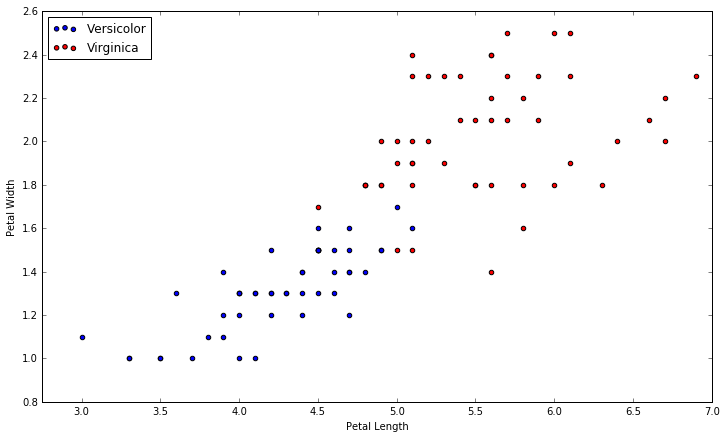

In [8]:
def plotpoints():
    colors = np.array(['b', 'r', 'b'])
    versicolor = plt.scatter(data[data[:, 2] == 0, 0], data[data[:, 2] == 0, 1], c=colors[0])
    virginica = plt.scatter(data[data[:, 2] == 1, 0], data[data[:, 2] == 1, 1], c=colors[1])
    plt.legend((versicolor, virginica), ("Versicolor", "Virginica"), loc='upper left')
    plt.xlabel("Petal Length")
    plt.ylabel('Petal Width')
    plt.xlim(2.75,7)
    
plotpoints()

## b.
Three data points are misclassified with this boundary

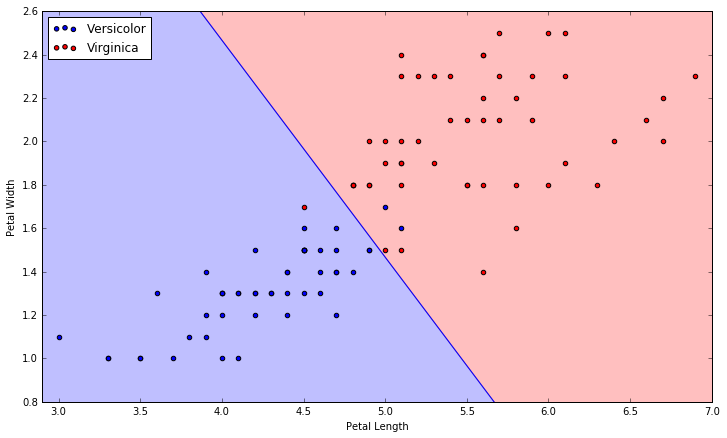

In [9]:
def plotboundary(weights):
    w = np.array(weights)
    dom = np.arange(min(data[:, 0])-1, max(data[:, 0])+1, step=0.1)
    y = (-w[0]+0.5 - dom * w[1]) / w[2]
    plt.fill_between(dom, y, where=y>0, color='blue', alpha=0.25)
    plt.fill_between(dom, y, 10, color='red', alpha=0.25)
    plotpoints()
    plt.plot(dom, y)
    plt.ylim(0.8, 2.6)
    plt.xlim(2.9, 7)

    
weight_guess = [-9.2, 1.5, 1.5]
plotboundary(weight_guess)

## c.
Define the classifier such that if $w^Tx<0$, $x$ is classified as Versicolor, and otherwise, $x$ is classified as Virginica$

In [6]:
numtoname = {0: 'Versicolor', 1: 'Virginica'}
# classify point in versicolor
observation = np.append(1, data[data[:, 2] == 0, :2][1])
print('Expected class: Versicolor.  Classifier prediction: %s'%numtoname[getcategory(np.dot(observation, weight_guess))])

# classify point in virginica
observation = np.append(1, data[data[:, 2] == 1, :2][1])
print('Expected class: Virginica.  Classifier prediction: %s'%numtoname[getcategory(np.dot(observation, weight_guess))])

Expected class: Versicolor.  Classifier prediction: Versicolor
Expected class: Virginica.  Classifier prediction: Virginica


## d.
The class can be determined by determining which circle contains the point. When there is an overlap of two circles, the class can be determined by drawing a line through the intersection points and splitting the data with that line. This method leads to 3 or 4 misclassifications.  If no circle contains the point, it can be labeled as "unclassifiable," but a better extension of this would be to select 3 means and label points by which mean they are closest to.

Setosa center: length=1.464, width=0.244
Versicolor center: length=3.76, width=0.926
Virginica center: length=5.882, width=2.426
Number misclassified: 4


(0.8, 7)

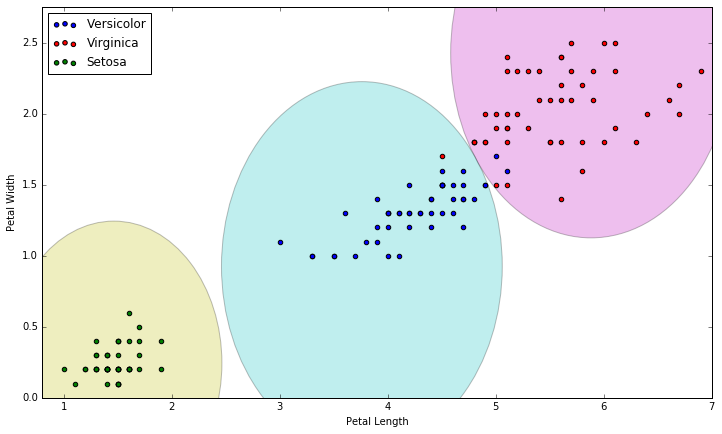

In [13]:
def circle_classify(centers, vector):
    a = np.zeros(len(vector))-1
    for i in range(len(vector)):
        row = vector[i]
        for ci in range(len(centers)):
            c = centers[ci]
            if (row[0]-c[0])**2+(row[1]-c[1])**2<1.3**2:
                a[i] = ci
    return a

def nmisclassified(centers, xs, expected):
    return np.count_nonzero(circle_classify(centers, xs)-expected)

data2 = np.loadtxt('irisdata.csv', delimiter=',', skiprows=1, converters={4: lambda s: namedict[s]})
data2 = data2.take((2, 3, 4), axis=1)

versicolor = data2[data2[:, 2] == 0]
virginica = data2[data2[:, 2] == 1]
setosa = data2[data2[:, 2] == 2]

cs = (np.mean(setosa[:,0]), np.mean(setosa[:,1]))
cvr = (np.mean(versicolor[:,0])-0.5, np.mean(versicolor[:,1])-0.4)
cva = (np.mean(virginica[:,0])+0.33, np.mean(virginica[:,1])+0.4)

print('Setosa center: length={:.4}, width={:.4}'.format(cs[0],cs[1]))
print('Versicolor center: length={:.4}, width={:.4}'.format(cvr[0],cvr[1]))
print('Virginica center: length={:.4}, width={:.4}'.format(cva[0],cva[1]))

print("Number misclassified: %s"%nmisclassified([cvr, cva, cs], data2, data2[:, 2]))


circle = plt.Circle(cs, radius=1, fc='y', zorder=-1, alpha=0.25)
plt.gca().add_patch(circle)

circle = plt.Circle(cva, radius=1.3, fc='m', zorder=-1, alpha=0.25)
plt.gca().add_patch(circle)

circle = plt.Circle(cvr, radius=1.3, fc='c', zorder=-1, alpha=0.25)
plt.gca().add_patch(circle)

colors = np.array(['b', 'r', 'g'])
versicolor = plt.scatter(data2[data2[:, 2] == 0, 0], data2[data2[:, 2] == 0, 1], c=colors[0])
virginica = plt.scatter(data2[data2[:, 2] == 1, 0], data2[data2[:, 2] == 1, 1], c=colors[1])
setosa = plt.scatter(data2[data2[:, 2] == 2, 0], data2[data2[:, 2] == 2, 1], c=colors[2])
plt.legend((versicolor, virginica, setosa), ("Versicolor", "Virginica", "Setosa"), loc='upper left')
plt.xlabel("Petal Length")
plt.ylabel('Petal Width')
plt.ylim(0, 2.75)
plt.xlim(0.8, 7)

# Exercise 2
## a.

In [8]:
def calc_mse(xs, classes, w):
    if xs.shape[1]!=3:
        xs = np.append(np.ones((xs.shape[0], 1)), xs, 1) # Add bias term to data vector
    return 1 / classes.shape[0] * np.sum(((np.dot(xs, w)) - classes) ** 2)

## b.

In [9]:
good_weight_guess = np.array([-9.75, 1.5, 1.5])
bad_weight_guess = np.array([9.75, 15, 0.5])
print("MSE for good decision boundary: %f.4" % calc_mse(data[:, :2], data[:, 2], good_weight_guess))
print("MSE for bad decision boundary: %f.4" % calc_mse(data[:, :2], data[:, 2], bad_weight_guess))

MSE for good decision boundary: 2.104550.4
MSE for bad decision boundary: 7148.546900.4


## c.
We would like to minimize MSE, which is proportional to 
$$D=\frac{1}{2}\sum_{i=1}^N(\mathbf{w}^T\mathbf{x_i}-c_i)^2 = \frac{1}{2}\sum_{i=1}^N(w_0+w_1x_{i,1}+w_2x_{i,2}-c_i)^2$$
$\frac{dD}{d\mathbf{w}}$ is a vector containing the derivative with respect to each weight, $w_0, w_1,$ and $w_2$. TO obtain it, we differentiate $D$ with respect to each of those variables.
$$\frac{dD}{dw_0} = \sum_{i=1}^N(w_0+w_1x_{i,1}+w_2x_{i,2}-c_i) = \sum_{i=1}^N(\mathbf{w}^T\mathbf{x_i}-c_i)$$
$$\frac{dD}{dw_1} = \sum_{i=1}^N(w_0+w_1x_{i,1}+w_2x_{i,2}-c_i)x_{1,i} = \sum_{i=1}^N(\mathbf{w}^T\mathbf{x_i}-c_i)x_{1,i}$$
$$\frac{dD}{dw_2} = \sum_{i=1}^N(w_0+w_1x_{i,1}+w_2x_{i,2}-c_i)x_{2,i} = \sum_{i=1}^N(\mathbf{w}^T\mathbf{x_i}-c_i)x_{2,i}$$
From this, because we define $\frac{dD}{d\mathbf{w}}$ as 
$$\begin{bmatrix}\frac{dD}{dw_0}\\\frac{dD}{dw_1}\\\frac{dD}{dw_2}\end{bmatrix}$$
we can say that 
$$\frac{dD}{d\mathbf{w}} = \begin{bmatrix}
\sum_{i=1}^N(\mathbf{w}^T\mathbf{x_i}-c_i)\\
\sum_{i=1}^N(\mathbf{w}^T\mathbf{x_i}-c_i)x_{1,i}\\
\sum_{i=1}^N(\mathbf{w}^T\mathbf{x_i}-c_i)x_{2,i}
\end{bmatrix}$$

## d.
The above vector form of the gradient is most convenient, because one step along the gradient will change each weight simultanously, but it is the same as updating each weight individually after calculating the derivatives along each weight. This is true because $\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta\frac{dD}{d\mathbf{w}}$, or expanded, 
$$\begin{bmatrix}w^{(t+1)}_0\\w^{(t+1)}_1\\w^{(t+1)}_2 \end{bmatrix} = \begin{bmatrix}w^{(t)}_0\\w^{(t)}_1\\w^{(t)}_2 \end{bmatrix} - \eta \begin{bmatrix}\frac{dD}{dw_0}\\\frac{dD}{dw_1}\\\frac{dD}{dw_2}\end{bmatrix} = \begin{bmatrix}
w^{(t)}_0-\eta\frac{dD}{dw_0}\\
w^{(t)}_1-\eta\frac{dD}{dw_1}\\
w^{(t)}_2-\eta\frac{dD}{dw_2}
\end{bmatrix}$$
This means that $w^{(t+1)}_0=w^{(t)}_0-\eta\frac{dD}{dw_0}$ and $w^{(t+1)}_1=w^{(t)}_1-\eta\frac{dD}{dw_1}$ and $w^{(t+1)}_2=w^{(t)}_2-\eta\frac{dD}{dw_2}$, the scalar form, is equivalent to the vector form

## e.
The initial steps are much larger than the remaining steps, as the gradient tends to be greater in magnitude further from the minimum.  Because this starting point is specified to be very close to the actual weights, it converges far more quickly than the actual algorithm

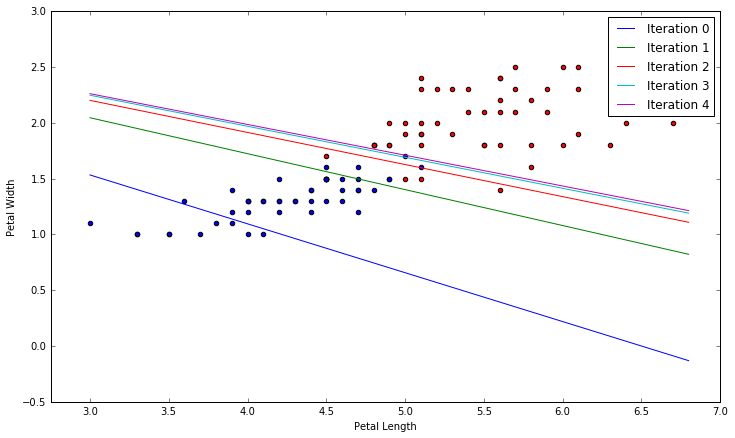

In [10]:
def calcgrad(w, ys, xs):
    diff = np.dot(xs, w) - ys # shape = (100,)
    rep = np.repeat(diff, 3, axis=0).reshape(100, 3) # shape = (100,)
    return np.sum(rep * xs, axis=0)# shape = (3,)

plotpoints()
ws = []
ws.append(np.array([-6, 1, 2.2834]))
for i in range(1,5): # calculate 5 iterations of gradient descent with eta=0.00025
    ws.append(ws[i-1] - 0.00025*calcgrad(ws[i-1], data[:,2], np.append(np.ones((100,1)),data[:,:2], 1)))
dom = np.arange(min(data[:, 0]), max(data[:, 0]), step=0.1)

# plot boundaries
for i in range(len(ws)):
    w = ws[i]
    plt.plot(dom, (-w[0] +0.5- dom * w[1]) / w[2], label='Iteration %d'%i)
plt.legend()

# Exercise 3
## a.

In [11]:
# same as function above
def calcgrad(w, ys, xs):
    diff = np.dot(xs, w) - ys
    rep = np.repeat(diff, 3, axis=0).reshape(100, 3)
    return np.sum(rep * xs, axis=0)

# calculates the MLE of the weights by gradient descent
def find_weights(maxiter=15000, eta=0.00025):
    x = np.append(np.ones((100,1)), data[:,:2], 1)
    y = data[:,2]
    w = (np.random.random(3) - 0.5) * 20 # Random but reasonably bounded initialization of weights
    elapsed = 0
    mses = [calc_mse(x[:,1:], y, w)] # stores MSE after each iteration
    newmse = mses[0]
    oldmse = 0
    ws = [list(w)] # stores weight vector after each iteration (for plotting)
    while elapsed < maxiter and abs(newmse - oldmse) > 10e-8:
        oldmse = newmse
        grad = calcgrad(w, y, x)
        w -=  eta * grad # update weights based on gradient
        newmse = calc_mse(x, y, w)
        mses.append(newmse)
        elapsed += 1
        ws.append(list(w))
    return w, np.array(ws), mses

## b.

In [12]:
def subplot_boundary(w, ax): # plot data and boundary on given axes based on given weight
    colors = np.array(['b', 'r', 'b'])
    versicolor = ax.scatter(data[data[:, 2] == 0, 0], data[data[:, 2] == 0, 1], c=colors[0])
    virginica = ax.scatter(data[data[:, 2] == 1, 0], data[data[:, 2] == 1, 1], c=colors[1])
    ax.legend((versicolor, virginica), ("Versicolor", "Virginica"), loc='upper left')
    ax.set_xlabel("Petal Length")
    ax.set_ylabel('Petal Width')
    ax.set_xlim((2.9, 7))
    ax.set_ylim((0.8, 2.6))
    dom = np.arange(min(data[:, 0]) - 1, max(data[:, 0]) + 1, step=1)
    ax.plot(dom, (-w[0] + 0.5 - dom * w[1]) / w[2])
    
def subplot_mse(mses, end, ax): # plots the mses up to end on ax
    ax.set_ylim((0, 10*mses[end]))
    ax.set_xlim((0, len(mses)))
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('MSE')
    if end != 0:
        ax.plot(mses[:end])
    else:
        ax.scatter([0], mses[0], s=40)
        ax.set_ylim((0, 1.5*mses[0]))

def plot_both(ws, mses, end, axarr, titles=['Boundary', 'MSE vs Number of Iterations']): 
    # requires axarr of length>=2 to plot boundary and MSEs 
    axarr[0].set_title(titles[0])
    axarr[1].set_title(titles[1])
    subplot_boundary(ws[end], axarr[0])
    subplot_mse(mses, end, axarr[1])

## c.

Optimal weights: [-1.63934577  0.21582376  0.64393332]


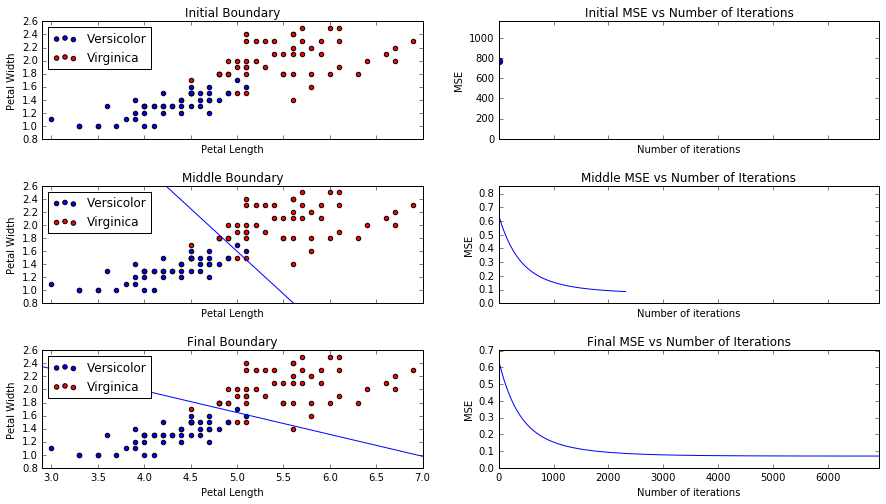

In [15]:
_, ws, mses = find_weights()
fig, ax = plt.subplots(3,2, sharex='col')
fig.set_size_inches(15, 8)
fig.subplots_adjust(hspace=0.4)
indices = [0, len(mses)//3, len(mses)-1] # 3 points to view
t0 = 'Boundary'
t1 = 'MSE vs Number of Iterations'
titles = [[i+t0, i+t1] for i in ['Initial ', 'Middle ', 'Final ']]
print("Optimal weights: "+str(ws[-1]))
for i in range(3):
    plot_both(ws, mses, indices[i], ax[i], titles[i])

## d.
I chose the gradient step size through experimentation.  I first chose $\eta=0.1/100$, as recommended by the lecture slides.  After only taking a couple steps, it was clear that this would diverge.  The next value I tried was 0.0005.  This performed much better, and may actually converge faster than the value I chose, but after observing a few steps it took, it appeared to be far too large of a step, as it would overshoot the target (determined from the graph in part 2e).  $\eta=0.00025$ seemed to not overshoot the minimum when taking several steps, or if it does, it barely does.  In addition, it does not increase the time required over 0.0005, probably because it did not overshoot

## e.
I determined the stopping criteria by observing that the differences in MSE are very small after a large number of iterations.  From that, I knew that a possible stopping criterion could be a very small change in MSE between iterations.  I experimented with 10e-6, 10e-7, and 10e-8, and I saw little to no performance change between them, so I decided to let a change in MSE of less than 10e-8 be one stopping criterion.  The other one, the number of iterations, is included to prevent an infinite loop if the algorithm gets stuck or diverges due to the learning rate

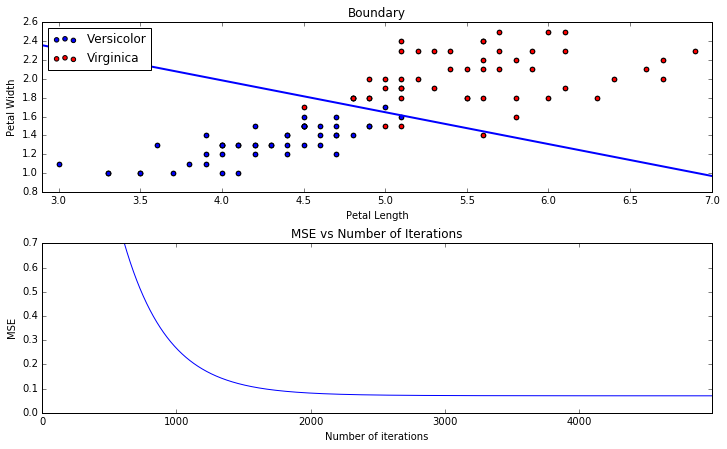

In [17]:
# I am not sure if part 3b requires any plotting, so I
# made an animation of the boundary and MSE vs Number of iterations. 
# The animation takes a little while to load.
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0.3)
ax[0].set_xlim((2.9, 7))
ax[0].set_ylim((0.8, 2.6))
line, = ax[0].plot([], [], lw=2)
# initialize weights
w = (np.random.random(3) - 0.5) * 100

dom = np.arange(min(data[:, 0]) - 1, max(data[:, 0]) + 1, step=1)
x = np.append(np.ones((100, 1)), data[:, :2], 1)
w, ws, mses = find_weights()
w = ws[0]
mseline, = ax[1].plot([], [])
ax[1].set_ylim((0, 100))
ax[1].set_xlim((0, len(mses)))
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('MSE')
ax[1].set_title('MSE vs Number of Iterations')


def init():
    colors = np.array(['b', 'r', 'b'])
    versicolor = ax[0].scatter(data[data[:, 2] == 0, 0], data[data[:, 2] == 0, 1], c=colors[0])
    virginica = ax[0].scatter(data[data[:, 2] == 1, 0], data[data[:, 2] == 1, 1], c=colors[1])
    ax[0].legend((versicolor, virginica), ("Versicolor", "Virginica"), loc='upper left')
    ax[0].set_xlabel("Petal Length")
    ax[0].set_ylabel('Petal Width')
    ax[0].set_title('Boundary')
    y = (-w[0] + 0.5 - dom * w[1]) / w[2]
    line.set_data(dom, y)
    mseline.set_data(range(len(mses)), mses)
    return (line,)


def animate(i):
    global w
    j = min(20*i, len(ws)-1)
    w = ws[j]
    mseline.set_data(range(len(mses[:j])), mses[:j])
    ax[1].set_ylim(0, 10 * mses[j]) # scale y axis so curve is more visible
    y = (-w[0] + 0.5 - dom * w[1]) / w[2]
    line.set_data(dom, y)
    return (line,)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=int(len(ws)/20)+20, interval=50, blit=True)